<a href="https://colab.research.google.com/github/raghavmayank/ML/blob/main/Assignment1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Q1: Data Preprocessing.
- 10 Marks
A csv file has been provided to you at this link(https://drive.google.com/file/d/1r3VZs0B54gNvaar9QmTbaHsV75p7b23l/view?usp=sharing). The given dataset is related to cars and contains
26 columns. In the given dataset, “Price” is the target variable (i.e., the output).

In [1]:
from pathlib import Path

import pandas as pd
import urllib

CARS_DATASET_PATH = "ml/assignment1/Cars93.csv"
def prepare_dataset():
    dataset_path = Path(CARS_DATASET_PATH)
    if not dataset_path.is_file():
        Path("ml/assignment1").mkdir(parents=True, exist_ok=True)
        url = "https://raw.githubusercontent.com/raghavmayank/data/main/raw/Cars93.csv"
        urllib.request.urlretrieve(url, dataset_path)
    return pd.read_csv(dataset_path)
cars_dataset = prepare_dataset()

1. Assign a type to each of the following features (a) Model, (b) Type, (c) Max. Price and (d)
Airbags from the following: ordinal/nominal/ratio/interval scale.

In [2]:
#Answer Q1(1)
print("Models are %s " % set(cars_dataset['Model'].values)) #Nominal
print("Type are %s " % set(cars_dataset['Type'].values)) #Nominal
print("Max.Price are %s " % set(cars_dataset['Max.Price'].values)) #Ratio
print("AirBags are %s " % set(cars_dataset['AirBags'].values)) #Ordinal

Models are {'626', '300E', 'Corrado', 'Camaro', 'LeBaron', '190E', 'Legend', 'DeVille', 'Protege', 'Diamante', 'ES300', 'Tercel', 'Grand_Prix', 'Maxima', 'Mustang', '240', '850', 'Elantra', '535i', 'Bonneville', 'Celica', 'Justy', 'Storm', 'Festiva', 'Sunbird', 'Caprice', 'Loyale', 'SC300', 'Taurus', 'Spirit', 'Continental', 'Passat', 'Shadow', 'Firebird', '90', 'Achieva', '323', 'Town_Car', '900', 'Cougar', 'Mirage', 'Altima', 'Lumina_APV', 'Probe', 'Quest', 'Crown_Victoria', 'Camry', 'Excel', 'Legacy', 'Dynasty', 'Cutlass_Ciera', 'Seville', 'Corsica', 'Fox', 'Concorde', 'Caravan', 'Astro', 'Lumina', 'RX-7', 'Eurovan', 'SL', 'MPV', 'Integra', 'Tempo', 'Swift', '100', 'Capri', 'Summit', 'Cavalier', 'Stealth', 'LeSabre', 'Sonata', 'Accord', 'LeMans', 'Eighty-Eight', 'Metro', 'Riviera', 'Laser', 'Imperial', 'Scoupe', 'Vision', 'Previa', 'Aerostar', 'Escort', 'Prelude', 'Q45', 'Silhouette', 'Corvette', 'Roadmaster', 'Civic', 'Colt', 'Sentra', 'Century'} 
Type are {'Midsize', 'Compact', 'S

***2. Write a function to handle the missing values in the dataset (e.g., any NA, NaN values).***

In [8]:
def missing_values(df):
    numerical = df.select_dtypes(include="number").columns
    for i in numerical:
        mean = df[i].mean()
        df[i].fillna(mean, inplace=True)
    categorical = df.select_dtypes(exclude="number").columns
    for i in categorical:
        mode = df[i].mode()
        df[i].fillna(mode, inplace=True)
    return df

3. Write a function to reduce noise (any error in the feature) in individual attributes.

In [9]:
import numpy as np
def remove_noise(df, cat_cols):
    for i in cat_cols:
        df[i] = pd.Categorical(df[i].apply(lambda x: None if str(x).isnumeric() else x))
    else:
        df[i] = pd.to_numeric(df[i].apply(lambda x: x if str(x).isnumeric() else None))

    # converting to correct data types
    for i in df.select_dtypes(include="number").columns:
        df[i] = pd.to_numeric(df[i])
    for i in df.select_dtypes(exclude="number").columns:
        df[i] = pd.Categorical(df[i])

    # handling outliers
    for i in df.select_dtypes(include="number").columns:
        # Calculate the first quartile (Q1) and third quartile (Q3)
        Q1 = df[i].quantile(0.25)
        Q3 = df[i].quantile(0.75)

        # Calculate the IQR (Interquartile Range)
        IQR = Q3 - Q1

        # Define the lower and upper bounds for outliers
        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR

        # capping to remove outliers with no loss of data
        df[i] = np.select(
            [df[i] < lower_bound, df[i] > upper_bound],
            [lower_bound, upper_bound],
            default=df[i],
        )

    return df

4. Write a function to encode all the categorical features in the dataset according to the type
of variable jointly.

In [10]:
def encode_categorical_features(df, drop_original=False):
    cat_cols = df.select_dtypes(exclude="number").columns
    df_encoded = pd.concat(
        [df, pd.get_dummies(df[cat_cols], drop_first=True, dtype="int64")]
    )
    if drop_original:
        df_encoded.drop(columns=cat_cols, inplace=True)
    return df_encoded

5. Write a function to normalize / scale the features either individually or jointly.

In [11]:
from sklearn.preprocessing import MinMaxScaler
def scale_features(df):
    scaler = MinMaxScaler()
    numerical_cols = df.select_dtypes(include="number").columns
    df[numerical_cols] = scaler.fit_transform(df[numerical_cols])
    return df

6. Write a function to create a random split of the data into train, validation and test sets in
the ratio of [70:20:10].

In [12]:
from sklearn.model_selection import train_test_split
def split_data(df):
    X = df.drop(columns=["Price"])
    y = df["Price"]
    X_train, X_temp, y_train, y_temp = train_test_split(X, y, test_size=0.3)
    X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.33)
    return X_train, X_val, X_test, y_train, y_val, y_test

In [16]:
cat_cols = ["Manufacturer", "Type", "Model", "AirBags", "Man.trans.avail", "Origin"]
cars_dataset = remove_noise(cars_dataset, cat_cols)
cars_dataset = scale_features(cars_dataset)
cars_dataset = encode_categorical_features(cars_dataset)
X_train, X_val, X_test, y_train, y_val, y_test = split_data(cars_dataset)
print(cars_dataset.shape,X_train.shape, X_val.shape, X_test.shape)

(186, 156) (130, 155) (37, 155) (19, 155)


/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_data.py:473: RuntimeWarning: All-NaN slice encountered
  data_min = np.nanmin(X, axis=0)
/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_data.py:474: RuntimeWarning: All-NaN slice encountered
  data_max = np.nanmax(X, axis=0)


1. Implement linear regression using the inbuilt function “LinearRegression” model in sklearn.

In [20]:
from sklearn.linear_model import LinearRegression

REGRESSION_DATASET_PATH = "ml/assignment1/linear_regression_dataset.csv"
def prepare_dataset():
    dataset_path = Path(REGRESSION_DATASET_PATH)
    if not dataset_path.is_file():
        Path("ml/assignment1").mkdir(parents=True, exist_ok=True)
        url = "https://raw.githubusercontent.com/raghavmayank/data/main/raw/linear_regression_dataset.csv"
        urllib.request.urlretrieve(url, dataset_path)
    return pd.read_csv(dataset_path).rename(
        columns=lambda x: str(x).strip()
    )
regression_dataset = prepare_dataset()
model = LinearRegression()
x = regression_dataset.drop(columns=["Weight"])
y = regression_dataset["Weight"]
model.fit(x,y)

LinearRegression()

2. Print the coefficient obtained from linear regression and plot a straight line on the scatter
plot.

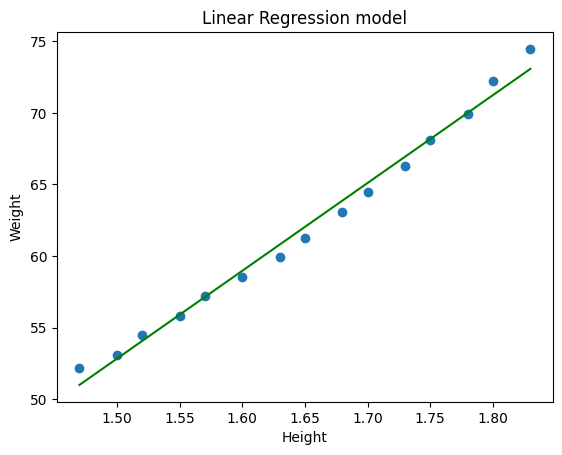

In [31]:
import matplotlib.pyplot as plt
print("Coefficients are:", model.coef_)
plt.scatter(x, y)
plt.plot(x, model.predict(x),color="green")
plt.title("Linear Regression model", color="black")
plt.xlabel("Height")
plt.ylabel("Weight")
plt.show()

3. Now, implement linear regression without the use of any inbuilt function (write it from
scratch).

Coefficients are : 61.272186542110624


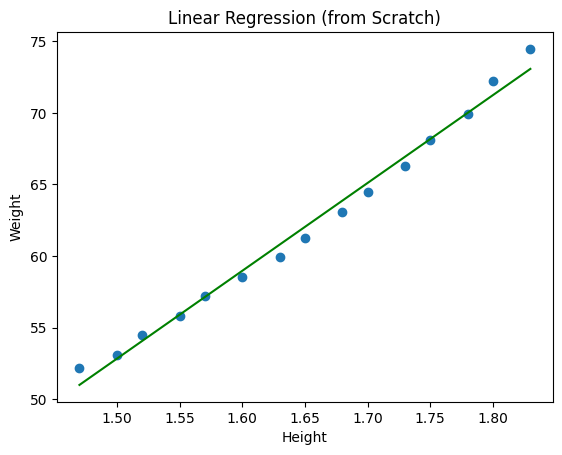

In [33]:
x = np.array(regression_dataset["Height"])
y = np.array(regression_dataset["Weight"])

# Calculate mean of X and y
mean_x = np.mean(x)
mean_y = np.mean(y)

# Total number of values
n = len(x)
slope = np.sum(
    (x - mean_x) * (y - mean_y)) / np.sum((x - mean_x)**2)
c = mean_y - slope * mean_x

# Print the coefficients
print("Coefficients are :", slope)

# Plotting the points
plt.scatter(x, y)

# Plotting the regression line
y_pred = slope * x + c
plt.plot(x, y_pred, color="green")

plt.title("Linear Regression (from Scratch)")
plt.xlabel("Height")
plt.ylabel("Weight")
plt.show()

4. Compare the results of 1 and 3 graphically.

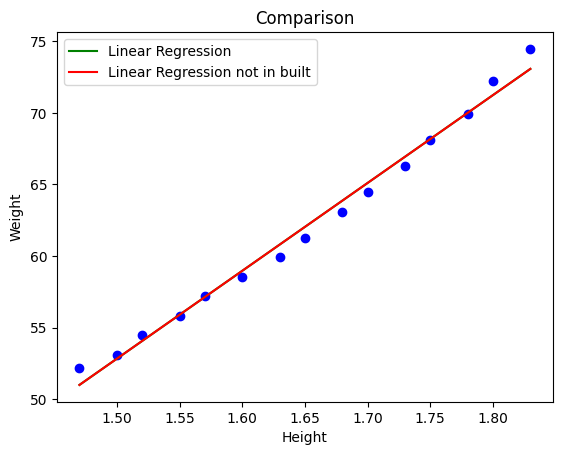

In [34]:
plt.scatter(x, y, color="blue")

plt.plot(
    regression_dataset["Height"],
    model.predict(regression_dataset[["Height"]]),
    color="green",
    label="Linear Regression",
)

plt.plot(
    regression_dataset["Height"],
    y_pred,
    color="red",
    label="Linear Regression not in built")

plt.title("Comparison")
plt.xlabel("Height")
plt.ylabel("Weight")
plt.legend()
plt.show()

1. Split the dataset into training set and test set in the ratio of 70:30 or 80:20

In [37]:
LOGISTIC_DATASET_PATH = "ml/assignment1/logistic_regression_dataset.csv"
def prepare_dataset():
    dataset_path = Path(LOGISTIC_DATASET_PATH)
    if not dataset_path.is_file():
        Path("ml/assignment1").mkdir(parents=True, exist_ok=True)
        url = "https://raw.githubusercontent.com/raghavmayank/data/main/raw/logistic_regression_dataset.csv"
        urllib.request.urlretrieve(url, dataset_path)
    return pd.read_csv(dataset_path).rename(
        columns=lambda x: str(x).strip()
    )
logistic_dataset = prepare_dataset()
x = logistic_dataset.drop(columns=["User ID", "Purchased"])
y = logistic_dataset["Purchased"]
x_train, x_test, y_train, y_test = train_test_split(
    x, y, test_size=0.2, random_state=42
)

2. Train the logistic regression classifier (using inbuilt function: LogisticRegression from
sklearn).

In [40]:
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LogisticRegression

num_cols = x.select_dtypes(include="number").columns
cat_cols = x.select_dtypes(exclude="number").columns
preprocessor = ColumnTransformer(
    [("scaler", StandardScaler(), num_cols), ("encoder", OneHotEncoder(), cat_cols)]
)
model = Pipeline(
    [("processor", preprocessor), ("logit", LogisticRegression(random_state=42))]
)
model.fit(x_train, y_train)
y_pred = model.predict(X_test)

3. Print the confusion matrix and accuracy.

In [43]:
from sklearn.metrics import confusion_matrix, accuracy_score
conf_matrix = confusion_matrix(y_test, y_pred)
print("conf matrix is ",conf_matrix)
accuracy = round(accuracy_score(y_test,y_pred),2)
print("accuracy is ",accuracy)

conf matrix is  [[50  2]
 [ 7 21]]
accuracy is  0.89


1. Store the dataset in your google drive and in Colab file load the dataset from your drive.

In [44]:
SVM_DATASET_PATH = "ml/assignment1/Dataset_2.csv"
def prepare_dataset():
    dataset_path = Path(SVM_DATASET_PATH)
    if not dataset_path.is_file():
        Path("ml/assignment1").mkdir(parents=True, exist_ok=True)
        url = "https://raw.githubusercontent.com/raghavmayank/data/main/raw/Dataset_2.csv"
        urllib.request.urlretrieve(url, dataset_path)
    return pd.read_csv(dataset_path).rename(
        columns=lambda x: str(x).strip()
    )
svm_dataset = prepare_dataset()
svm_dataset.isna().sum()

Age           0
Experience    0
Income        0
CCAvg         0
Mortgage      0
Securities    0
CreditCard    0
dtype: int64

2. Check the shape and head of the dataset.

In [45]:
svm_dataset.dtypes

Age             int64
Experience      int64
Income          int64
CCAvg         float64
Mortgage        int64
Securities      int64
CreditCard      int64
dtype: object

In [46]:
svm_dataset.shape

(5000, 7)

In [47]:
svm_dataset.head()

,Age,Experience,Income,CCAvg,Mortgage,Securities,CreditCard
0,25,1,49,1.6,0,1,0
1,45,19,34,1.5,0,1,0
2,39,15,11,1.0,0,0,0
3,35,9,100,2.7,0,0,0
4,35,8,45,1.0,0,0,1


3. Age, Experience, Income, CCAvg, Mortgage, Securities are the features and Credit Card
is your Target Variable.
i. Take any 3 features from the six features given above.
ii. Store features and targets into a separate variable.
iii. Look for missing values in the data, if any, and address them accordingly.
iv. Plot a 3D scatter plot using Matplotlib.

In [48]:
svm_dataset['Mortgage'] = pd.Categorical(svm_dataset['Mortgage'])
svm_dataset['Securities'] = pd.Categorical(svm_dataset['Securities'])
svm_dataset['CreditCard'] = pd.Categorical(svm_dataset['CreditCard'])

In [50]:
svm_dataset.dtypes

Age              int64
Experience       int64
Income           int64
CCAvg          float64
Mortgage      category
Securities    category
CreditCard    category
dtype: object

In [52]:
svm_dataset['CreditCard'].value_counts()

CreditCard
0    3530
1    1470
Name: count, dtype: int64

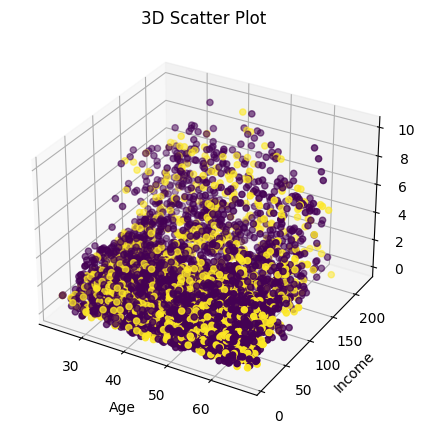

In [53]:
features = ["Age", "Income", "CCAvg"]
target = "CreditCard"
svm_dataset.dropna(inplace=True)

# Plot 3D scatter plot
fig = plt.figure(figsize=(5, 12))
ax = fig.add_subplot(111, projection="3d")
ax.scatter(
    svm_dataset[features[0]],
    svm_dataset[features[1]],
    svm_dataset[features[2]],
    c=svm_dataset[target],
    cmap="viridis",
)
ax.set_xlabel(features[0])
ax.set_ylabel(features[1])
ax.set_zlabel(features[2])
plt.title("3D Scatter Plot")
plt.show()

4. Split the dataset into 80:20. (3 features and 1 target variable).

In [59]:
from sklearn.svm import LinearSVC
from sklearn.metrics import roc_auc_score, classification_report
import warnings

warnings.filterwarnings("ignore")

# Split dataset into train and test sets
X = svm_dataset[features]
y = svm_dataset[target]


X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

# Train the model using LinearSVC with different values of C
C_values = [0.0001, 0.001, 0.01, 0.1, 1, 10, 100, 1000]

for C in C_values:
    clf = LinearSVC(C=C,random_state=42)
    clf.fit(X_train, y_train)
    score = roc_auc_score(y_test, clf.predict(X_test))
    print("C:", C, "Score:", score)

C: 0.0001 Score: 0.5
C: 0.001 Score: 0.5
C: 0.01 Score: 0.5
C: 0.1 Score: 0.5
C: 1 Score: 0.50008706756443
C: 10 Score: 0.500241854345639
C: 100 Score: 0.5065784382013776
C: 1000 Score: 0.5058722235121121


5. Train the model using scikit learn SVM API (LinearSVC) by setting the regularization
parameter C as C = {0.0001, 0.001, 0.01, 0.1, 1, 10, 100, 1000}.
i. For each value of C, print the score on test data.
ii. Make the prediction on test data.
iii. Print the confusion matrix and classification report.

In [60]:
clf = LinearSVC(C=100,random_state=42).fit(X_train, y_train)
conf_matrix = confusion_matrix(y_test, clf.predict(X_test))
report = classification_report(y_test,clf.predict(X_test))
print(conf_matrix)
print(report)

[[647  61]
 [263  29]]
              precision    recall  f1-score   support

           0       0.71      0.91      0.80       708
           1       0.32      0.10      0.15       292

    accuracy                           0.68      1000
   macro avg       0.52      0.51      0.48      1000
weighted avg       0.60      0.68      0.61      1000



6. Use gridSearchCV - a cross-validation technique to find the best regularization parameters
(i.e.: the best value of C).

In [62]:
from sklearn.svm import SVC
d = {'kernel':[],'C':[],'score':[]}
C_values = [0.0001, 0.001, 0.01, 0.1, 1]
kernels = ['poly', 'rbf', 'sigmoid','linear']
for kernel in kernels:
    for C in C_values:
        clf = SVC(C=C,kernel=kernel,random_state=42)
        clf.fit(X_train, y_train)
        score = roc_auc_score(y_test, clf.predict(X_test))
        print(kernel,C,score)
        d['kernel'].append(kernel)
        d['C'].append(C)
        d['score'].append(score)

poly 0.0001 0.5
poly 0.001 0.5
poly 0.01 0.5
poly 0.1 0.5
poly 1 0.5
rbf 0.0001 0.5
rbf 0.001 0.5
rbf 0.01 0.5
rbf 0.1 0.5
rbf 1 0.5
sigmoid 0.0001 0.5
sigmoid 0.001 0.5
sigmoid 0.01 0.5
sigmoid 0.1 0.4787651884529061
sigmoid 1 0.48919394783685477
linear 0.0001 0.5
linear 0.001 0.5
linear 0.01 0.5
linear 0.1 0.5
linear 1 0.5


In [65]:
k = pd.DataFrame(d)
k['score'] = k['score'].apply(lambda x : round(x,3))
k.to_csv('kernel_results.csv',index=False)

Q4: Decision Tree and Random Forest.
– 15 Marks
Load the IRIS dataset. The dataset consists of 150 samples of iris flowers, each belonging to one
of three species (setosa, versicolor, or virginica). Each sample includes four features: sepal
length, sepal width, petal length, and petal width.
1. Visualize the distribution of each feature and the class distribution.

In [66]:
# Importing necessary libraries
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import plot_tree
from sklearn.metrics import accuracy_score, confusion_matrix

iris = sns.load_dataset("iris")
iris.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


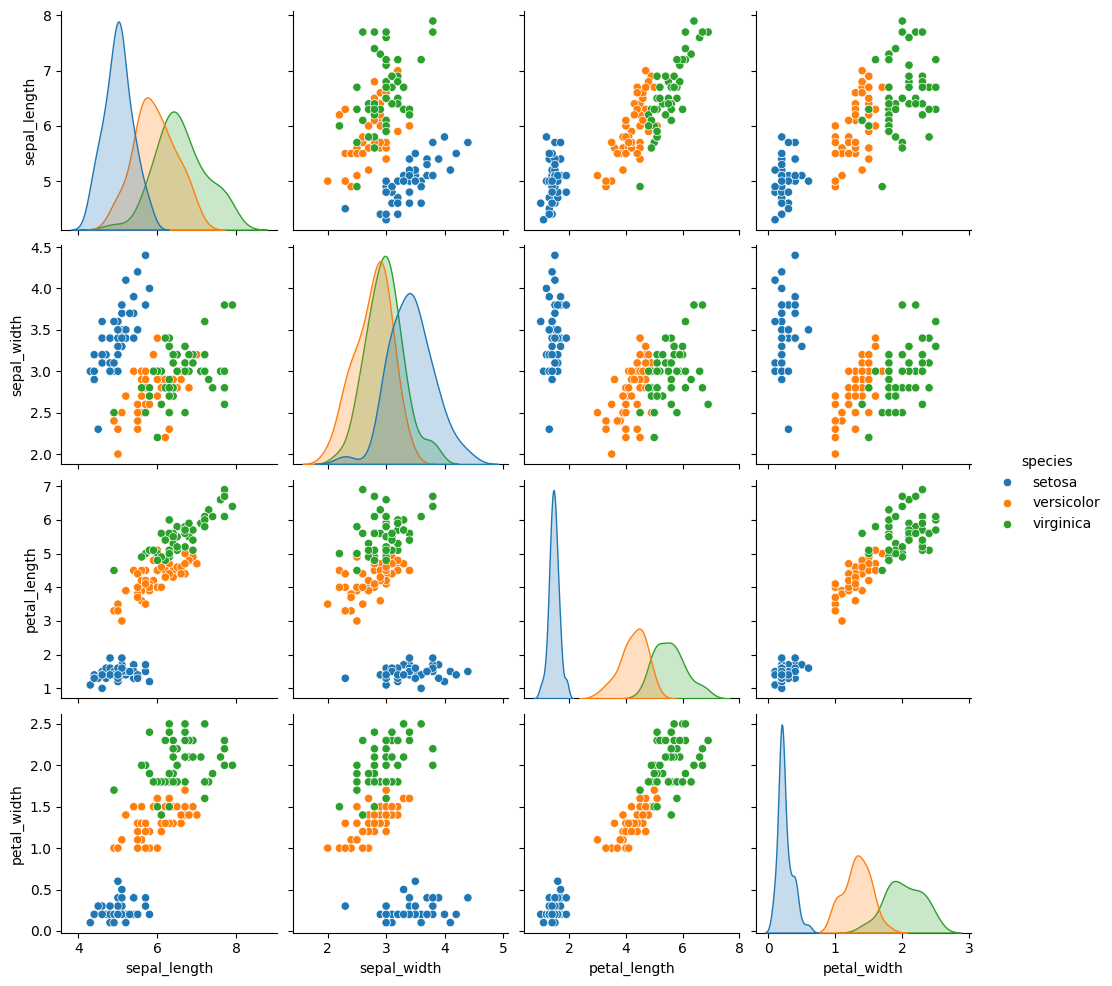

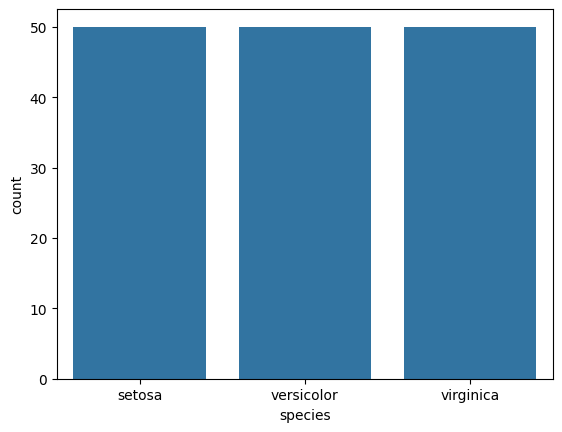

In [67]:
# Visualize the distribution of each feature
sns.pairplot(iris, hue="species")
plt.show()

# Visualize the class distribution
sns.countplot(x="species", data=iris)
plt.show()

2. Encode the categorical target variable (species) into numerical values.

In [68]:
# Encoding the categorical target variable

le = LabelEncoder()
classes = iris["species"].unique()
iris["species"] = le.fit_transform(iris["species"])
iris.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


3. Split the dataset into training and testing sets (use an appropriate ratio).

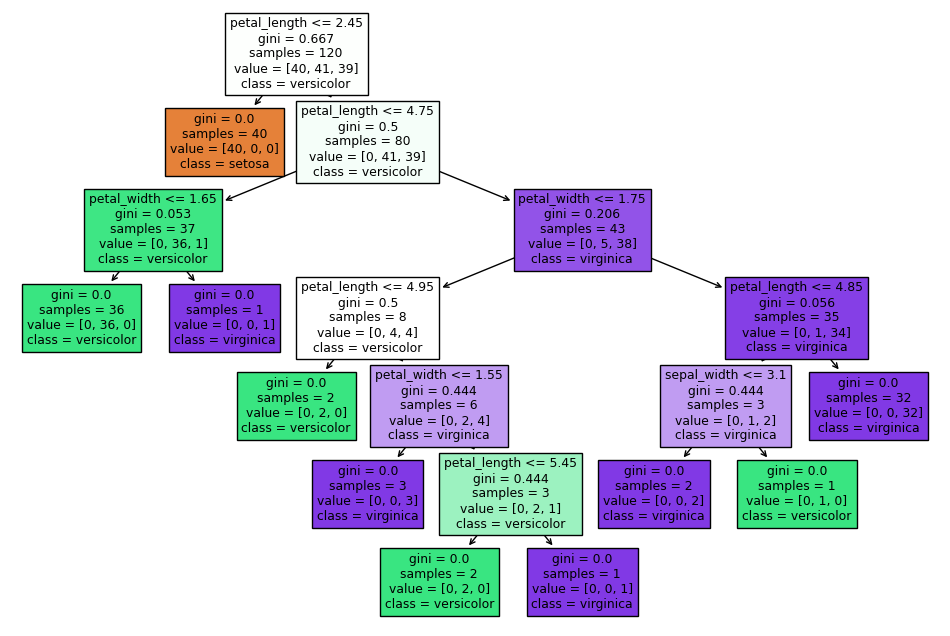

In [69]:
# Splitting the dataset into training and testing sets
X = iris.drop(columns=["species"])
y = iris["species"]

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

# Building a decision tree classifier
dt_classifier = DecisionTreeClassifier(random_state=42)
dt_classifier.fit(X_train, y_train)

# Visualizing the decision tree
plt.figure(figsize=(12, 8))
plot_tree(
    dt_classifier,
    feature_names=list(X.columns.values),
    class_names=list(classes),
    filled=True,
)
plt.show()

In [70]:
dt_classifier.predict(X_test)

array([1, 0, 2, 1, 1, 0, 1, 2, 1, 1, 2, 0, 0, 0, 0, 1, 2, 1, 1, 2, 0, 2,
       0, 2, 2, 2, 2, 2, 0, 0])

In [72]:
# Making predictions and evaluating the decision tree model
from sklearn.metrics import (
    confusion_matrix,
    precision_score,
    recall_score,
    f1_score
)
y_pred = dt_classifier.predict(X_test)
conf_matrix_dt = confusion_matrix(y_test, y_pred)

print("Confusion Matrix:\n", conf_matrix_dt)

precision = precision_score(y_test, y_pred, average="weighted")
print("Precision:", precision)

# Calculate recall
recall = recall_score(y_test, y_pred, average="weighted")
print("Recall:", recall)

# Calculate F1-score
f1 = f1_score(y_test, y_pred, average="weighted")
print("F1-score:", f1)

Confusion Matrix:
 [[10  0  0]
 [ 0  9  0]
 [ 0  0 11]]
Precision: 1.0
Recall: 1.0
F1-score: 1.0


In [73]:
# Building a random forest classifier
from sklearn.ensemble import RandomForestClassifier

rf_classifier = RandomForestClassifier(random_state=42)
rf_classifier.fit(X_train, y_train)

# Making predictions and evaluating the random forest model
y_pred_rf = rf_classifier.predict(X_test)
conf_matrix_rf = confusion_matrix(y_test, y_pred_rf)

print("Confusion Matrix:\n", conf_matrix_rf)
precision = precision_score(y_test, y_pred, average="weighted")
print("Precision:", precision)

# Calculate recall
recall = recall_score(y_test, y_pred, average="weighted")
print("Recall:", recall)

# Calculate F1-score
f1 = f1_score(y_test, y_pred, average="weighted")
print("F1-score:", f1)

Confusion Matrix:
 [[10  0  0]
 [ 0  9  0]
 [ 0  0 11]]
Precision: 1.0
Recall: 1.0
F1-score: 1.0
